# Install & Connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q tf-models-official==2.7.0
!pip install numpy==1.22 --ignore-installed
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 58.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# PreProcess

In [ ]:
DATA_PATH = os.path.join("/content", 'drive', 'MyDrive', 'Spam', 'spam.csv')
df1 = pd.read_csv(DATA_PATH)

df1['Category'] = df1['Category'].replace(['spam'], 1)
df1['Category'] = df1['Category'].replace(['ham'], 0)

df1['Label'] = df1['Category']


DATA_PATH2 = os.path.join("/content", 'drive', 'MyDrive', 'Spam', 'lingSpam.csv')
df2 = pd.read_csv(DATA_PATH2)

DATA_PATH3 = os.path.join("/content", 'drive', 'MyDrive', 'Spam', 'enronSpamSubset.csv')
df3 = pd.read_csv(DATA_PATH3)
df3['Message'] = df3['Body']

DATA_PATH4 = os.path.join("/content", 'drive', 'MyDrive', 'Spam', 'completeSpamAssassin.csv')
df4 = pd.read_csv(DATA_PATH4)
df4['Message'] = df4['Body']

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df = df.drop(['Category', 'Unnamed: 0', 'Body', 'Unnamed: 0.1'], axis=1)

df.head()


,Message,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['Message'] = df['Message'].astype('str')

In [ ]:
df.dtypes

Message    object
Label       int64
dtype: object

In [ ]:
df.head()

,Message,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
for i in range(8000, 8050):
  print(df[df['Label'] == 1]['Message'].iloc[i])


Kates Knickers
Click Here Only If You Are Over 18 Years Old 
Click Here If you wish to be removed from future mailings 

empty
creditfixThank You,Your email address was obtained from a purchased 
list, Reference # 1320-15000.Â Â If you wish to unsubscribe from this list, please 
Click here and enter your 
name into the remove box. If you have previously 
unsubscribed and are still receiving this message, you may email our 
Abuse Control Center, 
or call 1-888-763-2497, or write us at: NoSpam, 6484 Coral Way, 
Miami, FL, 33155".
Â© 2002 Web Credit Inc. All Rights Reserved.

Hello:Are you satisfied with your ISP? Do you have 5 email addresses for you and your family? Do you have 5 MB of personal webspace? How truly unlimited is your access time?Our internet service provides you with all of that at a low monthly fee of just $14.95. You get 5 email addresses, 5MB of personal webspace and 350 hours of access time per month (virtually unlimited). That is more than most people will use, do t

In [ ]:
wc0 = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text = ' '.join(df[df['Label'] == 0]['Message']))
wc1 = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text = ' '.join(df[df['Label'] == 1]['Message']))

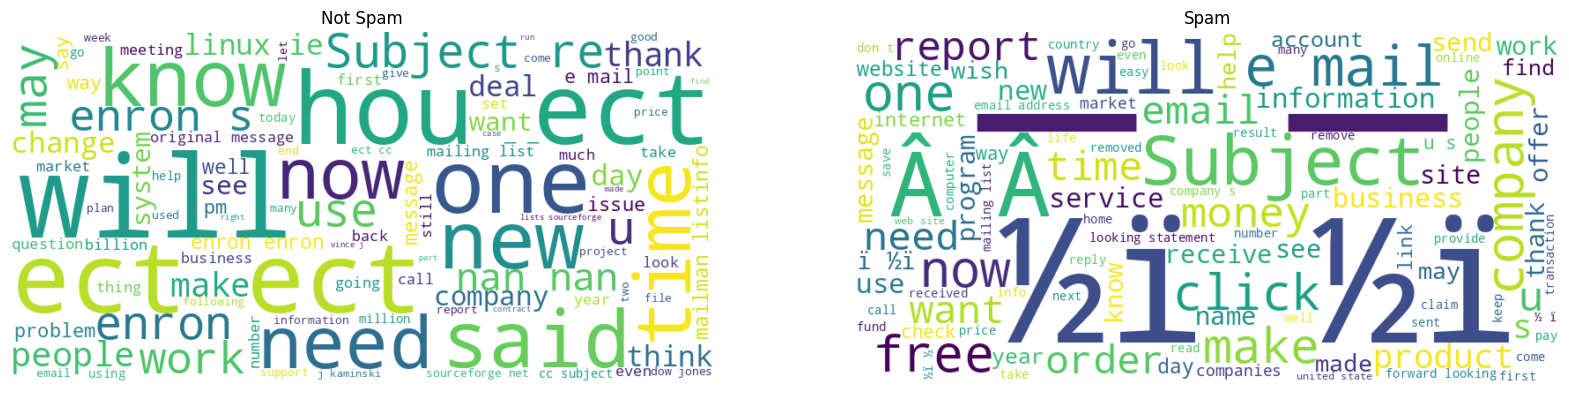

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.imshow(wc0, interpolation='bilinear')
plt.title("Not Spam")
plt.axis('off')
plt.subplot(122)
plt.imshow(wc1, interpolation='bilinear')
plt.title("Spam")
plt.axis('off')
plt.show()

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(df['Message'], df['Label'], test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split( X_test_val, y_test_val, test_size=0.5)

In [ ]:
print(len(df.index))

24223


In [ ]:
BATCH_SIZE = 64

train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)
).batch(BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test, y_test)
).batch(BATCH_SIZE)

val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val, y_val)
).batch(BATCH_SIZE)

In [ ]:
max_features = 10000  # Maximum vocab size.
max_len = 160  # Sequence length to pad the outputs to.

# Create the layer.
tokenize = tf.keras.layers.TextVectorization(
 max_tokens=max_features,
 output_mode='int',
 output_sequence_length=max_len)

tokenize.adapt(df['Message'].values)

In [ ]:
train_token_ds = train_ds.map(lambda x, y : (tokenize(x), y))
val_token_ds = val_ds.map(lambda x, y : (tokenize(x), y))
test_token_ds = test_ds.map(lambda x, y : (tokenize(x), y))

In [ ]:
for text, label in train_ds:
    print(text)
    print(label.numpy())
    break

tf.Tensor(
[b'Shhhhh nobody is supposed to know!'
 b"Subject: inexpensive meds\n have you thought about taking viagra but\n decided that it wasn ' t worth the risk ?\n please visit the url :\n http : / / www . 1 holymoly . info / rx / ? 7\n not intrested then click here\n http : / / vjslnsldkfj . info / ? hwjmjyhfjlua 3 nn"
 b"Subject: re : 80 ( % off mediccationn\n mediccationns at lowesst pricess everyy !\n over 80 . % offf , pricess wontt get lowerr\n we selll vic ' od ( in v , ia . gra x , ana . x\n http : / / www . opspills . com / in . php ? aid = 35\n"
 b"Subject: urgent news\n would you reflnance if you knew you ' d save thousands ?\n we can get you lnterest as low as 2 . 80 % .\n fill out our small form below and we ' ll show you how .\n get the house and / or car you always wanted , it\n takes less than a minute of your time\n http : / / www . ez - rate . info / qute / ido 501 . php\n haven ' t you liked walking ?"
 b'Subject: considered unsolicited bulk email from you\n your

# Evaluation Utils

In [ ]:
def get_top1(pred, ds):
  y_true = []
  for X, y in ds:
      for d in y:
          y_true.append(d.numpy())
  y_true = np.array(y_true)

  y_true_a = y_true
  y_pred_a = np.round(pred)

  return [y_true_a, y_pred_a]

def plot_cfm_and_summary(y_true, y_pred_1):
  cf = confusion_matrix(y_true, y_pred_1)
  ideal = confusion_matrix(y_true, y_true)

  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(16.5, 4.5)
  ConfusionMatrixDisplay(ideal).plot(cmap="YlGnBu", ax=axes[0])
  axes[0].set_title("Ideal")
  ConfusionMatrixDisplay(cf).plot(cmap="YlGnBu", ax=axes[1])
  axes[1].set_title("Top 1")
  plt.plot()

  print("Top 1")
  print("Accuracy : ", end="")
  print(accuracy_score(y_true, y_pred_1))
  print("F1 Score : ", end="")
  print(f1_score(y_true, y_pred_1, average="macro"))
  print("")
  print(classification_report(y_true, y_pred_1))

# Bi-LSTM

In [ ]:
bilstm_model = tf.keras.models.Sequential([
    layers.Embedding(30000, 128, input_shape=[160]),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(256, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation='sigmoid')
])

bilstm_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

bilstm_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=2, min_lr=1e-6)

In [ ]:
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 128)          3840000   
                                                                 
 bidirectional (Bidirectiona  (None, 160, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 160, 512)         1050624   
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                        

In [ ]:
history_bilstm = bilstm_model.fit(train_token_ds, validation_data=val_token_ds, epochs=10, callbacks=[bilstm_reduce_lr])

Epoch 1/10
303/303 [==============================] - 41s 134ms/step - loss: 0.1419 - accuracy: 0.9476 - val_loss: 0.1010 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 2/10
303/303 [==============================] - 23s 77ms/step - loss: 0.0991 - accuracy: 0.9632 - val_loss: 0.0907 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 3/10
303/303 [==============================] - 23s 77ms/step - loss: 0.0925 - accuracy: 0.9652 - val_loss: 0.0950 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 4/10
303/303 [==============================] - 24s 79ms/step - loss: 0.0782 - accuracy: 0.9694 - val_loss: 0.0889 - val_accuracy: 0.9666 - lr: 0.0010
Epoch 5/10
303/303 [==============================] - 24s 79ms/step - loss: 0.0754 - accuracy: 0.9704 - val_loss: 0.0888 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 6/10
303/303 [==============================] - 25s 81ms/step - loss: 0.0821 - accuracy: 0.9686 - val_loss: 0.0964 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 7/10
303/303 [==============================] - 25s

In [ ]:
bilstm_model.save("/content/drive/MyDrive/Spam/bilstm_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
bilstm_model = load_model("/content/drive/MyDrive/Spam/bilstm_model.h5")

In [ ]:
pred_bilstm = bilstm_model.predict(test_token_ds)

38/38 [==============================] - 7s 25ms/step


Top 1
Accuracy : 0.9727610400330169
F1 Score : 0.968782502365938

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1627
           1       0.98      0.94      0.96       796

    accuracy                           0.97      2423
   macro avg       0.97      0.96      0.97      2423
weighted avg       0.97      0.97      0.97      2423



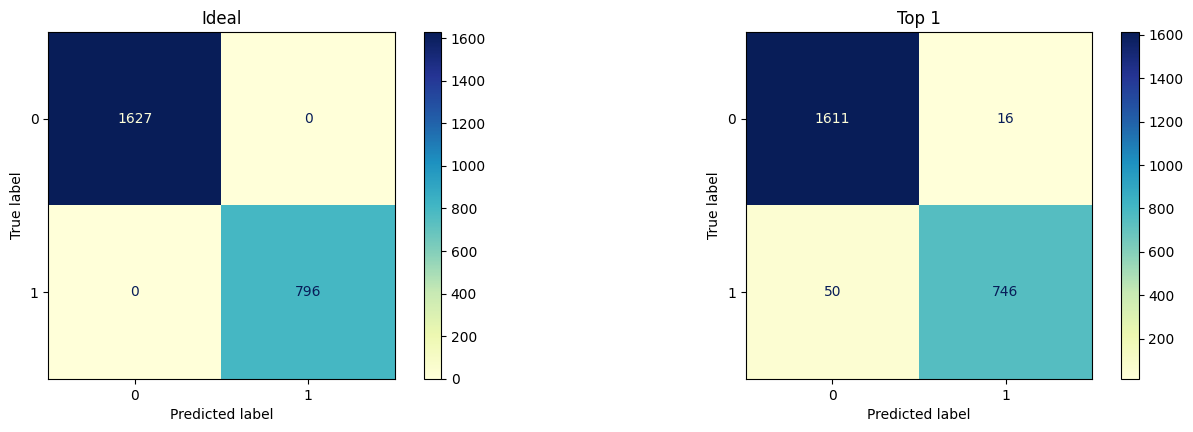

In [ ]:
plot_cfm_and_summary(*get_top1(pred_bilstm, test_token_ds))

# Bi-GRU

In [ ]:
bigru_model = tf.keras.models.Sequential([
    layers.Embedding(30000, 128, input_shape=[160]),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(256, return_sequences=True)),
    layers.Bidirectional(layers.GRU(64)),
    layers.Dense(1, activation='sigmoid')
])

bigru_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

bigru_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=2, min_lr=1e-6)

In [ ]:
bigru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 160, 128)          3840000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 160, 256)         198144    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 160, 512)         789504    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              221952    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
history_bigru = bigru_model.fit(train_token_ds, validation_data=val_token_ds, epochs=10, callbacks=[bigru_reduce_lr])

Epoch 1/10
303/303 [==============================] - 69s 196ms/step - loss: 0.2421 - accuracy: 0.9028 - val_loss: 0.1316 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 2/10
303/303 [==============================] - 21s 68ms/step - loss: 0.1142 - accuracy: 0.9567 - val_loss: 0.0983 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 3/10
303/303 [==============================] - 21s 69ms/step - loss: 0.0968 - accuracy: 0.9629 - val_loss: 0.1278 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 4/10
303/303 [==============================] - 21s 70ms/step - loss: 0.0846 - accuracy: 0.9670 - val_loss: 0.0935 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 5/10
303/303 [==============================] - 21s 70ms/step - loss: 0.0742 - accuracy: 0.9708 - val_loss: 0.1003 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 6/10
303/303 [==============================] - 21s 71ms/step - loss: 0.0698 - accuracy: 0.9719 - val_loss: 0.0939 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 7/10
303/303 [==============================] - 21s

In [ ]:
bigru_model = load_model("/content/drive/MyDrive/Spam/bigru_model.h5")

In [ ]:
pred_bigru = bigru_model.predict(test_token_ds)

38/38 [==============================] - 3s 24ms/step


Top 1
Accuracy : 0.9723483285183656
F1 Score : 0.9683627769725933

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1627
           1       0.98      0.94      0.96       796

    accuracy                           0.97      2423
   macro avg       0.97      0.96      0.97      2423
weighted avg       0.97      0.97      0.97      2423



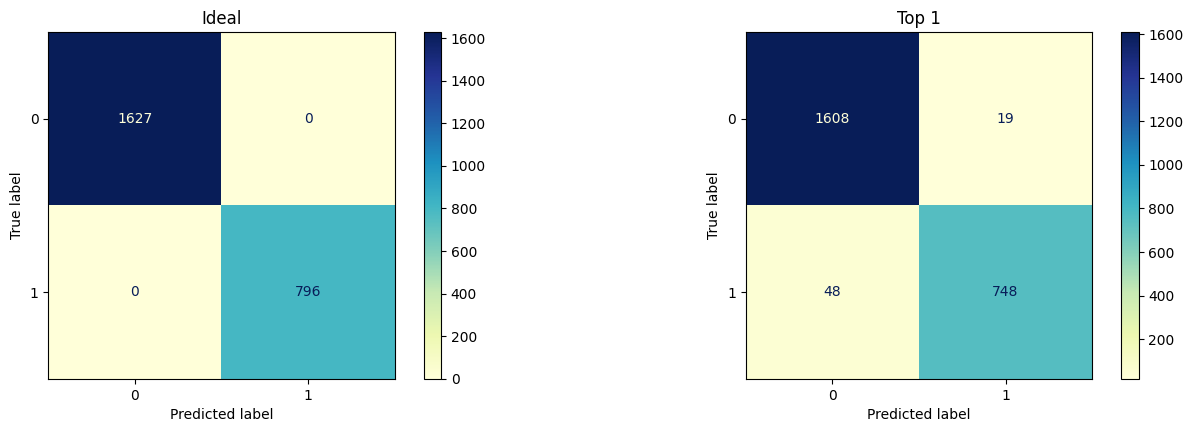

In [ ]:
plot_cfm_and_summary(*get_top1(pred_bigru, test_token_ds))

In [ ]:
bigru_model.save("/content/drive/MyDrive/Spam/bigru_model.h5")

# BERT

In [ ]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)

  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
bert = build_classifier_model()
bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
bert.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    metrics=['accuracy']
)

bert_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=2, min_lr=1e-6)

In [ ]:
history_bert = bert.fit(x=train_ds, validation_data=val_ds, epochs=10, callbacks=[bert_reduce_lr])

Epoch 1/10
303/303 [==============================] - 201s 613ms/step - loss: 0.1998 - accuracy: 0.9187 - val_loss: 0.1192 - val_accuracy: 0.9540 - lr: 3.0000e-05
Epoch 2/10
303/303 [==============================] - 187s 617ms/step - loss: 0.1023 - accuracy: 0.9608 - val_loss: 0.0847 - val_accuracy: 0.9672 - lr: 3.0000e-05
Epoch 3/10
303/303 [==============================] - 186s 615ms/step - loss: 0.0826 - accuracy: 0.9678 - val_loss: 0.0815 - val_accuracy: 0.9680 - lr: 3.0000e-05
Epoch 4/10
303/303 [==============================] - 187s 617ms/step - loss: 0.0761 - accuracy: 0.9690 - val_loss: 0.0831 - val_accuracy: 0.9690 - lr: 3.0000e-05
Epoch 5/10
303/303 [==============================] - 185s 613ms/step - loss: 0.0735 - accuracy: 0.9708 - val_loss: 0.0752 - val_accuracy: 0.9706 - lr: 3.0000e-05
Epoch 6/10
303/303 [==============================] - 186s 615ms/step - loss: 0.0683 - accuracy: 0.9725 - val_loss: 0.0771 - val_accuracy: 0.9706 - lr: 3.0000e-05
Epoch 7/10
303/303 [==

In [ ]:
bert.load_weights("/content/drive/MyDrive/Spam/bert_model.h5")

In [ ]:
pred_bert = bert.predict(test_ds)

38/38 [==============================] - 10s 244ms/step


Top 1
Accuracy : 0.9752373091209244
F1 Score : 0.9716586530588692

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1627
           1       0.98      0.94      0.96       796

    accuracy                           0.98      2423
   macro avg       0.98      0.97      0.97      2423
weighted avg       0.98      0.98      0.98      2423



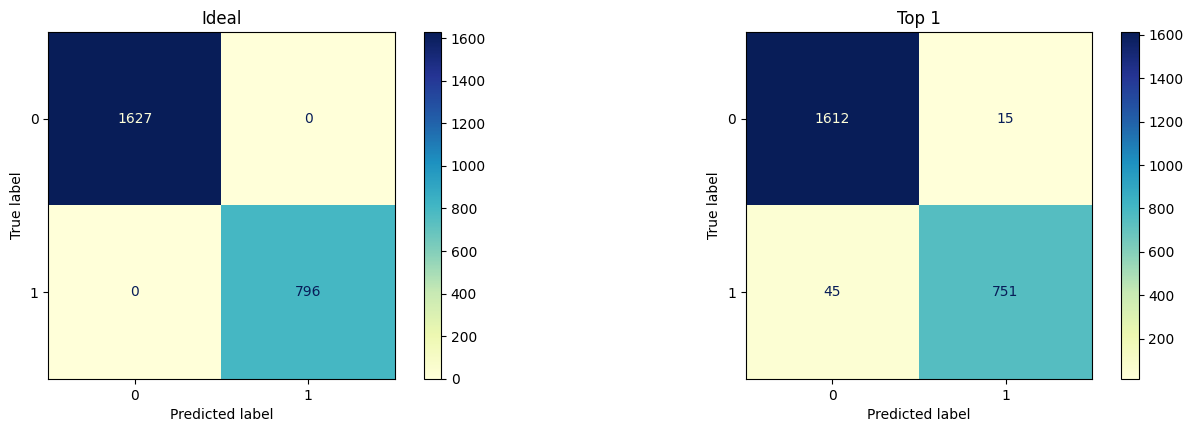

In [ ]:
plot_cfm_and_summary(*get_top1(pred_bert, test_ds))

In [ ]:
bert.save("/content/drive/MyDrive/Spam/bert_model.h5")

In [ ]:
LABELS = [
    'SPAM',
    'NOT SPAM'
]

In [ ]:
LABELS[int(np.round(bert.predict(["hi this is not a spam please reply"]))[0,0])]

1/1 [==============================] - 0s 36ms/step


'SPAM'